https://igotanoffer.com/blogs/tech/facebook-machine-learning-engineer-interview

# 1. Two Sum

In [26]:
import math
from collections import Counter, defaultdict

In [10]:
def twoSum(nums, target):
    if len(nums) <= 1:
        return -1
    
    hash_map = {}
    
    for i in range(len(nums)):
        ntf = target - nums[i]
        if nums[i] not in hash_map.keys():
            hash_map[ntf] = i
            print(hash_map)
        else:
            print('else')
            print(i)
            return [hash_map[nums[i]], i]
    
            

In [13]:
nums = [2,7,11,15]
target = 22
twoSum(nums, target)

{20: 0}
{20: 0, 15: 1}
{20: 0, 15: 1, 11: 2}
else
3


[1, 3]

# 2. Product of array except self

In [21]:
def productExceptSelf(nums):
    length = len(nums)
    
    L, R, answer = [0]*length, [0]*length, [0]*length
    
    L[0] = 1
    
    for i in range(1, len(nums)):
        L[i] = nums[i-1] * L[i-1]
        
    R[length - 1] = 1
    
    for i in reversed(range(length - 1)):
        R[i] = nums[i+1] * R[i+1]
    
    for i in range(length):
        answer[i] = L[i] * R[i]
    
    return answer

In [22]:
nums = [1,2,4,5]
productExceptSelf(nums)

[40, 20, 10, 8]

# 3. Valid Palindrome II

In [23]:
def validPalindrome(s):
    def check_palindrome(s, i, j):
        while i < j:
            if s[i] != s[j]:
                return False
            i += 1
            j -= 1
        return True
    
    left = 0
    right = len(s) - 1
    
    while left < right:
        if s[left] != s[right]:
            return check_palindrome(s, left+1, right) or check_palindrome(s, left, right - 1)
        left += 1
        right -= 1
    return True

In [25]:
s = 'abca'
validPalindrome(s)

False

# 4. Group Anagrams

In [35]:
# Time Complexity: O(NKlogK), where N is the length of strs, and K is the maximum length of a string in strs. 
# The outer loop has complexity O(N) as we iterate through each string. 
# Then, we sort each string in O(KlogK) time.

# Space Complexity: O(NK), the total information content stored in ans.

def groupAnagrams(strs):
    ans = defaultdict(list)
    
    for s in strs:
        ans[tuple(sorted(s))].append(s)
        #print(ans)
    return ans.values()

In [36]:
strs = ["eat","tea","tan","ate","nat","bat"]
groupAnagrams(strs)

dict_values([['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']])

# 5. Valid Parenthesis

In [37]:
def isValid(s):
    parens = {
            '(':')',
            '{':'}',
            '[':']'
        }
    
    stack = []
    
    for i in range(len(s)):
        if s[i] in parens.keys():
            stack.append(s[i])
        else:
            if len(stack) > 0:
                leftBracket = stack.pop()
            else:
                return False
            correctBracket = parens[leftBracket]
            if s[i] != correctBracket:
                return False
    return len(stack) == 0
                

In [38]:
s = "()[]{}"
isValid(s)

True

In [40]:
s = '[{()}]'
isValid(s)

True

In [41]:
s = '[{()}'
isValid(s)

False

# 6. 3Sum

Read the theory: https://leetcode.com/problems/3sum/solution/

In [46]:
# T --> O(n^2). TwoSumII is O(N) and we call it N times. Sorting takes O(NlogN)
# So O(NlogN + N^2) --> O(N^2)
# S --> from O(logN) to O(N) --> Depends on the sorting algo
def threeSum(nums):
    result = []
    nums.sort()
    
    for i in range(len(nums)):
        if nums[i] > 0:
            break
        if i == 0 or nums[i - 1] != nums[i]:
            twoSumII(nums, i, result)
    return result

def twoSumII(nums, i, result):
    lo = i + 1
    hi = len(nums) - 1
    
    while lo < hi:
        sums = nums[i] + nums[lo] + nums[hi]
        if sums < 0:
            lo += 1
        elif sums > 0:
            hi -= 1
        else:
            result.append([nums[i], nums[lo], nums[hi]])
            lo += 1
            hi -= 1
            while lo < hi and nums[lo] == nums[lo - 1]:
                lo += 1
    

In [45]:
nums = [-1,0,1,2,-1,-4]
threeSum(nums)

[[-1, -1, 2], [-1, 0, 1]]

# 7. Range Sum of BST

In [47]:
def rangeSumBST(root, low, high):
    result = 0
    
    queue = [root]
    
    while len(queue) > 0:
        currNode = queue.pop(0)
        if currNode.val >= low and currNode.val <= high:
            result += currNode.val
        if currNode.left is not None:
            queue.append(currNode.left)
        if currNode.right is not None:
            queue.append(currNode.right)
    
    return result

# 8. Diameter of binary tree

In [48]:
def diameterOfBinaryTree(root):
    diameter = 0
    
    def longest_path(node):
        if not node:
            return 0
        
        nonlocal diameter
        left_path = longest_path(node.left)
        right_path = longest_path(node.right)
        
        diameter = max(diameter, left_path + right_path)
        
        return max(left_path, right_path) + 1
    
    longest_path(root)
    return diameter
        

# 9. K Closest Points to Origin

In [2]:
def kClosest(points, k):
    points.sort(key = lambda P: P[0]**2 + P[1]**2)
    return points[:k]

In [3]:
points = [[3,3],[5,-1],[-2,4]]
k = 2
kClosest(points, k)

[[3, 3], [-2, 4]]

# 10. Intersection of Two Arrays

In [6]:
def intersection(nums1, nums2):
    result = []
    
        
    for i in range(len(nums1)):
        if nums1[i] in nums2 and nums1[i] not in result:
            result.append(nums1[i])
    
    return result

In [7]:
nums1 = [1,2,2,1]
nums2 = [2,2]
intersection(nums1, nums2)

[2]

# 11. Merge two sorted arrays

In [8]:
def merge(nums1, m, nums2, n):
    nums1_copy = nums1[:m]
    
    p1 = 0
    p2 = 0
    
    for i in range(m+n):
        if p2 >= n or (p1 < m and nums1_copy[p1] < nums2[p2]):
            nums1[i] = nums1_copy[p1]
            p1 += 1
        else:
            nums1[i] = nums2[p2]
            p2 += 1
            

In [9]:
nums1 = [1,2,3,0,0,0]
m = 3
nums2 = [2,5,6]
n = 3

merge(nums1, m, nums2, n)
nums1

[1, 2, 2, 3, 5, 6]

# 12. Remove duplicates from an array

In [21]:
def removeDuplicates(nums):
    if len(nums) == 0:
        return 0
    
    i = 0
    
    for j in range(1, len(nums)):
        if nums[j] != nums[i]:
            i += 1
            nums[i] = nums[j]
    return i + 1

In [22]:
nums = [1,1,2]
removeDuplicates(nums)

2

In [23]:
nums = [0,0,1,1,1,2,2,3,3,4]
removeDuplicates(nums)

5

# 13. Count frequency of an element in an array

In [24]:
def countFrequency(nums, target):
    if target not in nums:
        return 0
    
    counter = 0
    
    for i in range(len(nums)):
        if nums[i] == target:
            counter += 1
    return counter

In [31]:
def binary_search(nums, no_to_find, left, right):
    
    while left <= right:
        mid = int((left + right)/2)
        if nums[mid] == no_to_find:
            return mid
        elif nums[mid] < no_to_find:
            left = mid + 1
        else:
            right = mid - 1
    return -1

def countFrequencyBinary(nums, target):
    if target not in nums:
        return 0
    
    firstPosition = binary_search(nums, target, 0, len(nums) - 1)
    
    if firstPosition == -1:
        return 0
    
    startPosition = firstPosition
    endPosition = firstPosition
    temp1 = 0
    temp2 = 0
    
    while startPosition != -1:
        temp1 = startPosition
        startPosition = binary_search(nums, target, 0, startPosition - 1)
    startPosition = temp1
    
    while endPosition != -1:
        temp2 = endPosition
        endPosition = binary_search(nums, target, endPosition + 1, len(nums) - 1)
    
    endPosition = temp2
    
    return endPosition - startPosition + 1

In [34]:
nums = [1,1,3,4,5,5,5,7,7]

countFrequency(nums, 5)

3

In [35]:
nums = [1,1,3,4,5,5,5,7,7]

countFrequencyBinary(nums, 5)

3

# 14. Find minimum element of an array

In [40]:
def findMinimum(nums):
    minNumber = nums[0]
    
    for i in range(len(nums) - 1):
        if nums[i] <= minNumber:
            minNumber = nums[i]
    return minNumber

In [43]:
nums = [5,3,6,2,3]
findMinimum(nums)

2

# 15. Remove element in place

In [76]:
def removeElement(nums, val):
    i = 0
    
    for j in range(len(nums)):
        if nums[j] != val:
            nums[i] = nums[j]
            i += 1
    return i

In [78]:
nums = [3,2,2,3,3]
val = 3
removeElement(nums, val)

2

# 16. Search Insert Position

In [79]:
def binary_search(nums, target, left, right):
    while left <= right:
        mid = int((left + right)/2)
        if nums[mid] == target:
            return mid
        elif nums[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return left

def searchInsert(nums, target):
    
    return binary_search(nums, target, 0, len(nums) - 1)
    
    

In [80]:
nums = [1,3,5,6] 
target = 5
searchInsert(nums, target)

2

In [81]:
nums = [1,3,5,6]
target = 2
searchInsert(nums, target)

1

# 17. Find kth Largest element

In [84]:
def find_kth_largest(nums, k):
    quicksort(nums, 0, len(nums) - 1)
    return nums[-k]
    
def quicksort(nums, left, right):
    if left < right:
        partitionIndex = partition(nums, left, right)
        
        quicksort(nums, left, partitionIndex - 1)
        quicksort(nums, partitionIndex + 1, right)

def partition(nums, left, right):
    pivotElement = nums[right]
    partitionIndex = left
    
    for j in range(left, right):
        if nums[j] <= pivotElement:
            swap(nums, partitionIndex, j)
            partitionIndex += 1
        swap(nums, partitionIndex, right)
    return partitionIndex

def swap(nums, i, j):
    temp = nums[i]
    nums[i] = nums[j]
    nums[j] = temp
    

In [157]:
find_kth_largest([5,6,6,1,4,8,3],3)

6

In [90]:
def quickselect(nums, left, right, index_to_find):
    partitionIndex = partition(nums, left, right)
    
    if partitionIndex == index_to_find:
        return nums[partitionIndex]
    elif partitionIndex < index_to_find:
        return quickselect(nums, partitionIndex + 1, right, index_to_find)
    else:
        return quickselect(nums, left, partitionIndex - 1, index_to_find)

def partition(nums, left, right):
    partitionIndex = left
    for j in range(left, right+1):
        if nums[j] <= nums[right]:
            swap(nums, partitionIndex, j)
            partitionIndex += 1
    return partitionIndex - 1

def find_kth_largest_quickselect(nums, k):
    index_to_find = len(nums) - k
    quickselect(nums, 0, len(nums) - 1, index_to_find)
    return nums[-k]

In [156]:
find_kth_largest_quickselect([5,5,6,1,4,8,3],4)


5

# 18. Maximum Subarray

## Kadane's algorithm

In [92]:
def maxSubArray(nums):
    current_subarray = nums[0]
    maximum_subarray = nums[0]
    
    for num in nums[1:]:
        current_subarray = max(num, current_subarray + num)
        maximum_subarray = max(current_subarray, maximum_subarray)
    return maximum_subarray

In [93]:
nums = [-2,1,-3,4,-1,2,1,-5,4]
maxSubArray(nums)

6

# 19. Plus One

In [102]:
def plusOne(digits):
    str_number = "".join([str(i) for i in digits])
    int_number = int(str_number)
    add_one = int_number + 1
    result = []
    for i in str(add_one):
        result.append(int(i))
    return result

In [103]:
digits = [1,2,3]
plusOne(digits)

[1, 2, 4]

# 20. Convert sorted array to binary search tree

In [105]:
def sortedArrayToBST(nums):
    def helper(left, right):
        if left > right:
            return None
        mid = int((left+right)/2)

        root = TreeNode(nums[mid])
        root.left = helper(left, mid-1)
        root.right = helper(mid+1, right)
        return root
    return helper(0, len(nums) - 1)

# 21. Single Number

In [127]:
from collections import defaultdict
def singleNumber(nums):
    d = defaultdict(int)
    
    for i in range(len(nums)):
        d[nums[i]] +=1 
    
    
    for i in d:
        if d[i] == 1:
            return i


In [128]:
nums = [4,1,2,1,2]
singleNumber(nums)

4

In [134]:
11%2

1

# 22. Contains Duplicate

In [135]:
def containsDuplicate(nums):
    d = defaultdict(int)
    
    for i in nums:
        d[i] += 1
    
    for i in d:
        if d[i] > 1:
            return True
    return False

In [137]:
nums = [1,2,3]
containsDuplicate(nums)

False

# 23. Third maximum number

In [149]:
def thirdMax(nums):
    nums = set(nums)
    
    maximum = max(nums)
    
    if len(nums) < 3:
        return maximum
    
    nums.remove(maximum)
    second_maximum = max(nums)
    nums.remove(second_maximum)
    return max(nums)

In [152]:
nums = [2,2,3,1]
thirdMax(nums)

1

In [151]:
nums = [1,2]
thirdMax(nums)

2

In [158]:
# quickselect won't work as it cannot handle duplicates
def quickselect(nums, left, right, index_to_find):
    partitionIndex = partition(nums, left, right)

    if index_to_find == partitionIndex:
        return nums[partitionIndex]
    elif index_to_find > partitionIndex:
        return quickselect(nums, partitionIndex + 1, right, index_to_find)
    else:
        return quickselect(nums, left, partitionIndex - 1, index_to_find)

def partition(nums, left, right):
    partitionIndex = left

    for j in range(left, right+1):
        if nums[j] <= nums[right]:
            swap(nums, partitionIndex, j)
            partitionIndex += 1


    return partitionIndex - 1

def thirdMax_quickselect(nums):
    index_to_find = len(nums) - 3
    quickselect(nums, 0, len(nums) - 1, index_to_find)
    return nums[-3]

In [154]:
nums = [2,2,3,1]
thirdMax_quickselect(nums)

2

# 24. Count odd even

In [161]:
def countOddEven(nums):
    count_odd = 0
    count_even = 0
    
    for i in nums:
        if i%2 == 0:
            count_even += 1
        else:
            count_odd += 1
    return count_even, count_odd

In [162]:
nums = [2,2,3,1]
countOddEven(nums)

(2, 2)

# 25. Move Zeroes

In [176]:
def moveZeroes(nums):
    countZeroes = 0
    
    left = 0
    
    while left < len(nums) - 1:
        if nums[left] == 0:
            nums.pop(left)
            countZeroes += 1
            
        else:
            left += 1
    
    for i in range(countZeroes):
        nums.append(0)
    
    

In [177]:
nums = [0,1,0,3,12]
moveZeroes(nums)
nums

[1, 3, 12, 0, 0]

# 26. Binary Search

In [183]:
import math
def search(nums, target):
    left = 0
    right = len(nums) - 1
    
    
    
    while left <= right:
        mid = math.floor((left+right)/2)
        if nums[mid] == target:
            return mid
        elif nums[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

In [184]:
nums = [-1,0,3,5,9,12]
target = 9
search(nums, target)

4

# 27. Rotate Array

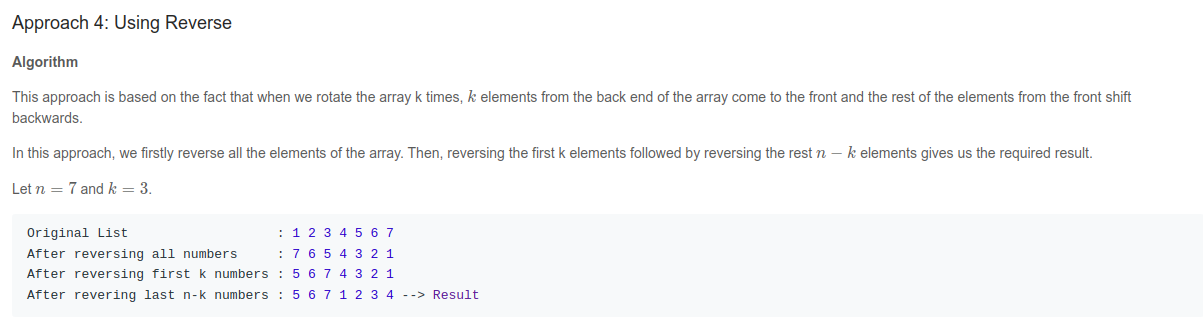

In [195]:
# T --> O(n)
# S --> O(1)
def reverse(nums, left, right):
    while left < right:
        nums[left], nums[right] = nums[right], nums[left]
        left += 1
        right -= 1

def rotate(nums, k):
    n = len(nums)
    # we do this next line for single length arrays
    k %= n
    
    reverse(nums, 0, n - 1)
    reverse(nums, 0, k - 1)
    reverse(nums, k, n - 1)

In [196]:
nums = [1,2,3,4,5,6,7]
k = 3
rotate(nums, k)

In [194]:
nums

[5, 6, 7, 1, 2, 3, 4]

# 28. Product of array except self

In [3]:
def productExceptSelf(nums):
    n = len(nums)
    
    L, R, answer = [0]*n, [0]*n, [0]*n
    
    L[0] = 1
    
    for i in range(1, n):
        L[i] = L[i-1] * nums[i-1]
    
    R[n-1] = 1
    
    for i in reversed(range(n-1)):
        R[i] = R[i+1] * nums[i+1]
    
    for i in range(n):
        answer[i] = L[i] * R[i]
    
    return answer

In [4]:
nums = [1,2,3,4]
productExceptSelf(nums)

[24, 12, 8, 6]

# 29. Remove vowels from String

In [11]:
def removeVowels(s):
    for i in s:
        if i in ['a', 'e', 'i', 'o', 'u']:
            s = s.replace(i, "")
    return s

In [12]:
s = "leetcodeisacommunityforcoders"
removeVowels(s)

'ltcdscmmntyfrcdrs'

In [13]:
s = "aeiou"
removeVowels(s)

''

# 30. Defanging an IP Address

In [18]:
def defangIPaddr(address):
    return address.replace('.', '[.]')

In [19]:
address = "1.1.1.1"
defangIPaddr(address)

'1[.]1[.]1[.]1'

# 31. Jewels and Stones

In [24]:
jewels = "aA"
stones = "aAAbbbb"

def numJewelsInStones(jewels, stones):
    stones_in_jewels = [i for i in jewels]
    
    result = 0
    
    for i in stones:
        if i in stones_in_jewels:
            result += 1
    return result


In [26]:
jewels = "aA"
stones = "aAAbbbb"
numJewelsInStones(jewels, stones)

3

In [32]:
def restoreString(s, indices):
    res = [''] * len(s)
    for index, char in enumerate(s):
        res[indices[index]] = char
    return "".join(res)

In [33]:
s = "codeleet"
indices = [4,5,6,7,0,2,1,3]
restoreString(s, indices)

'leetcode'

# 32. Split a string in balanced string

In [34]:
def isValid(s):
    parens = {
            '(':')',
            '{':'}',
            '[':']'
        }
    
    stack = []
    
    for i in range(len(s)):
        if s[i] in parens.keys():
            stack.append(s[i])
        else:
            if len(stack) > 0:
                leftBracket = stack.pop()
            else:
                return False
            correctBracket = parens[leftBracket]
            if s[i] != correctBracket:
                return False
    return len(stack) == 0
                

In [36]:
def balancedStringSplit(s):
    
    result = 0
    count = 0
    
    for i in s:
        if i == 'L':
            count += 1
        else:
            count -= 1
        if count == 0:
            result += 1
    return result

In [37]:
s = "RLRRLLRLRL"
balancedStringSplit(s)

4

In [40]:
move_dict = {'U':[-1, 0],
             'R':[0, 1],
             'D':[1, 0],
             'L':[0, -1]}

start = [0,0]

move_dict['U'][0] + start[0]

-1

# 33. Robot Return to Origin

In [54]:
def judgeCircle(moves):
    x = y = 0
        
    for move in moves:
        if move == 'U':
            y += 1
        elif move == 'R':
            x += 1
        elif move == 'D':
            y -= 1
        else:
            x -= 1

    return x == y == 0

In [55]:
moves = "UD"
judgeCircle(moves)

True

# 35. First Unique Character in a String

In [61]:
from collections import defaultdict, Counter
def firstUniqChar(s):
    
    count = Counter(s)
    
    for i, val in enumerate(s):
        if count[val] == 1:
            return i
    return -1

# 36. Reverse String

In [62]:
def reverseString(s):
    left = 0
    right = len(s) - 1
    
    while left < right:
        s[left], s[right] = s[right], s[left]
        left += 1
        right -= 1
    
    return s

In [63]:
s = ["h","e","l","l","o"]
reverseString(s)

['o', 'l', 'l', 'e', 'h']

# 37. Palindrome

In [68]:
def isPalindrome(s):
    left = 0
    right = len(s) - 1
    
    while left < right:
        while left < right and not s[left].isalnum():
            left += 1
        while left < right and not s[right].isalnum():
            right -= 1
        if s[left].lower() != s[right].lower():
            return False
        left += 1
        right -= 1
    return True  

In [71]:
s = "A man, a plan, a canal: Panama"
isPalindrome(s)

True

In [72]:
haystack = "sadbutsad"
needle = "sad"

needle in haystack

True

# 38. Valid parenthesis

In [1]:
def isValid(s):
    
    parens = {
        '(': ')',
        '{': '}',
        '[': ']'
    }
    
    stack = []
    
    for i in range(len(s)):
        if s[i] in parens.keys():
            stack.append(s[i])
        else:
            if len(stack) > 0:
                leftBracket = stack.pop()
            else:
                return False
            correctBracket = parens[leftBracket]
            if s[i] != correctBracket:
                return False
    return len(stack) == 0

In [4]:
s = "()[]{}"
isValid(s)

True

# 39. Roman to Integer

In [5]:
def romanToInt(s):
    values = {
        "I": 1,
        "V": 5,
        "X": 10,
        "L": 50,
        "C": 100,
        "D": 500,
        "M": 1000,
    }

    total = 0
    i = 0
    
    while i < len(s):
        if i + 1 < len(s) and (values[s[i+1]] > values[s[i]]):
            total += values[s[i+1]] - values[s[i]]
            i += 2
        else:
            total += values[s[i]]
            i += 1
    return total

In [6]:
s = "MCMXCIV"
romanToInt(s)

1994

# 40. Excel Sheet Column Number

In [29]:
def titleToNumber(columnTitle):
    result = 0
    
    alpha_map = {chr(i + 65): i + 1 for i in range(26)}
    
    for i in range(len(columnTitle)):
        curr_char = columnTitle[len(columnTitle) - 1 - i]
        result += (alpha_map[curr_char] * (26**i))
    return result

In [30]:
columnTitle = "ZY"
titleToNumber(columnTitle)

701

In [32]:
columnTitle = "C"
titleToNumber(columnTitle)

3

# 41. Longest Substring Without Repeating Characters

In [34]:
def lengthOfLongestSubstring(s):
    if len(s) <= 1:
        return len(s)
    
    longest = 0
    left = 0
    seenChars = {}
    
    for right in range(len(s)):
        currChar = s[right]
        prevSeenChar = -1
        if currChar in seenChars.keys():
            prevSeenChar = seenChars[currChar]
        if prevSeenChar >= left:
            left = prevSeenChar + 1
        seenChars[currChar] = right
        longest = max(longest, right - left + 1)
    return longest

In [35]:
s = "pwwkew"
lengthOfLongestSubstring(s)

3

In [38]:
s = 'abb'
len(set(s))

2

In [3]:
s = 'abc'
int(s)

ValueError: invalid literal for int() with base 10: 'abc'